In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [13]:
import pandas as pd

try:
    data = pd.read_csv("/home/activator/Desktop/PLP/week7python/housing.csv")
    print(" Dataset loaded successfully!\n")

    print("🔍 First 5 rows:")
    print(data.head())

    print("\n Dataset Info:")
    print(data.info())

    print("\nChecking missing values:")
    print(data.isnull().sum())

    data.fillna(data.mean(numeric_only=True), inplace=True)
    print("\n Missing values filled with column means.")

except FileNotFoundError:
    print(" File not found. Please check your file path.")
except Exception as e:
    print(f" error occurred: {e}")


 Dataset loaded successfully!

🔍 First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

 Dataset Info:
<class 'pand

In [14]:
# 1. Basic descriptive statistics
print("Dataset Summary:")
print(data.describe())

# 2. Median & standard deviation
print("\nMedian values:\n", data.median(numeric_only=True))
print("\nStandard deviation:\n", data.std(numeric_only=True))

# 3. Group by 'ocean_proximity' and calculate mean
if 'ocean_proximity' in data.columns:
    group_mean = data.groupby('ocean_proximity').mean(numeric_only=True)
    print("\nGroup-wise Mean by 'ocean_proximity':\n", group_mean)

    # 4. Observations
    print("\n Findings:")
    print("Coastal areas like 'NEAR OCEAN' often have higher median house values.")
    print(" INLAND areas have higher population density but lower house values.")
    print("→Income and house value vary significantly by region.")
else:
    print("No 'ocean_proximity' column found to perform group analysis.")


Dataset Summary:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%

/tmp/ipykernel_3578/3933329758.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)


<Figure size 2000x500 with 0 Axes>

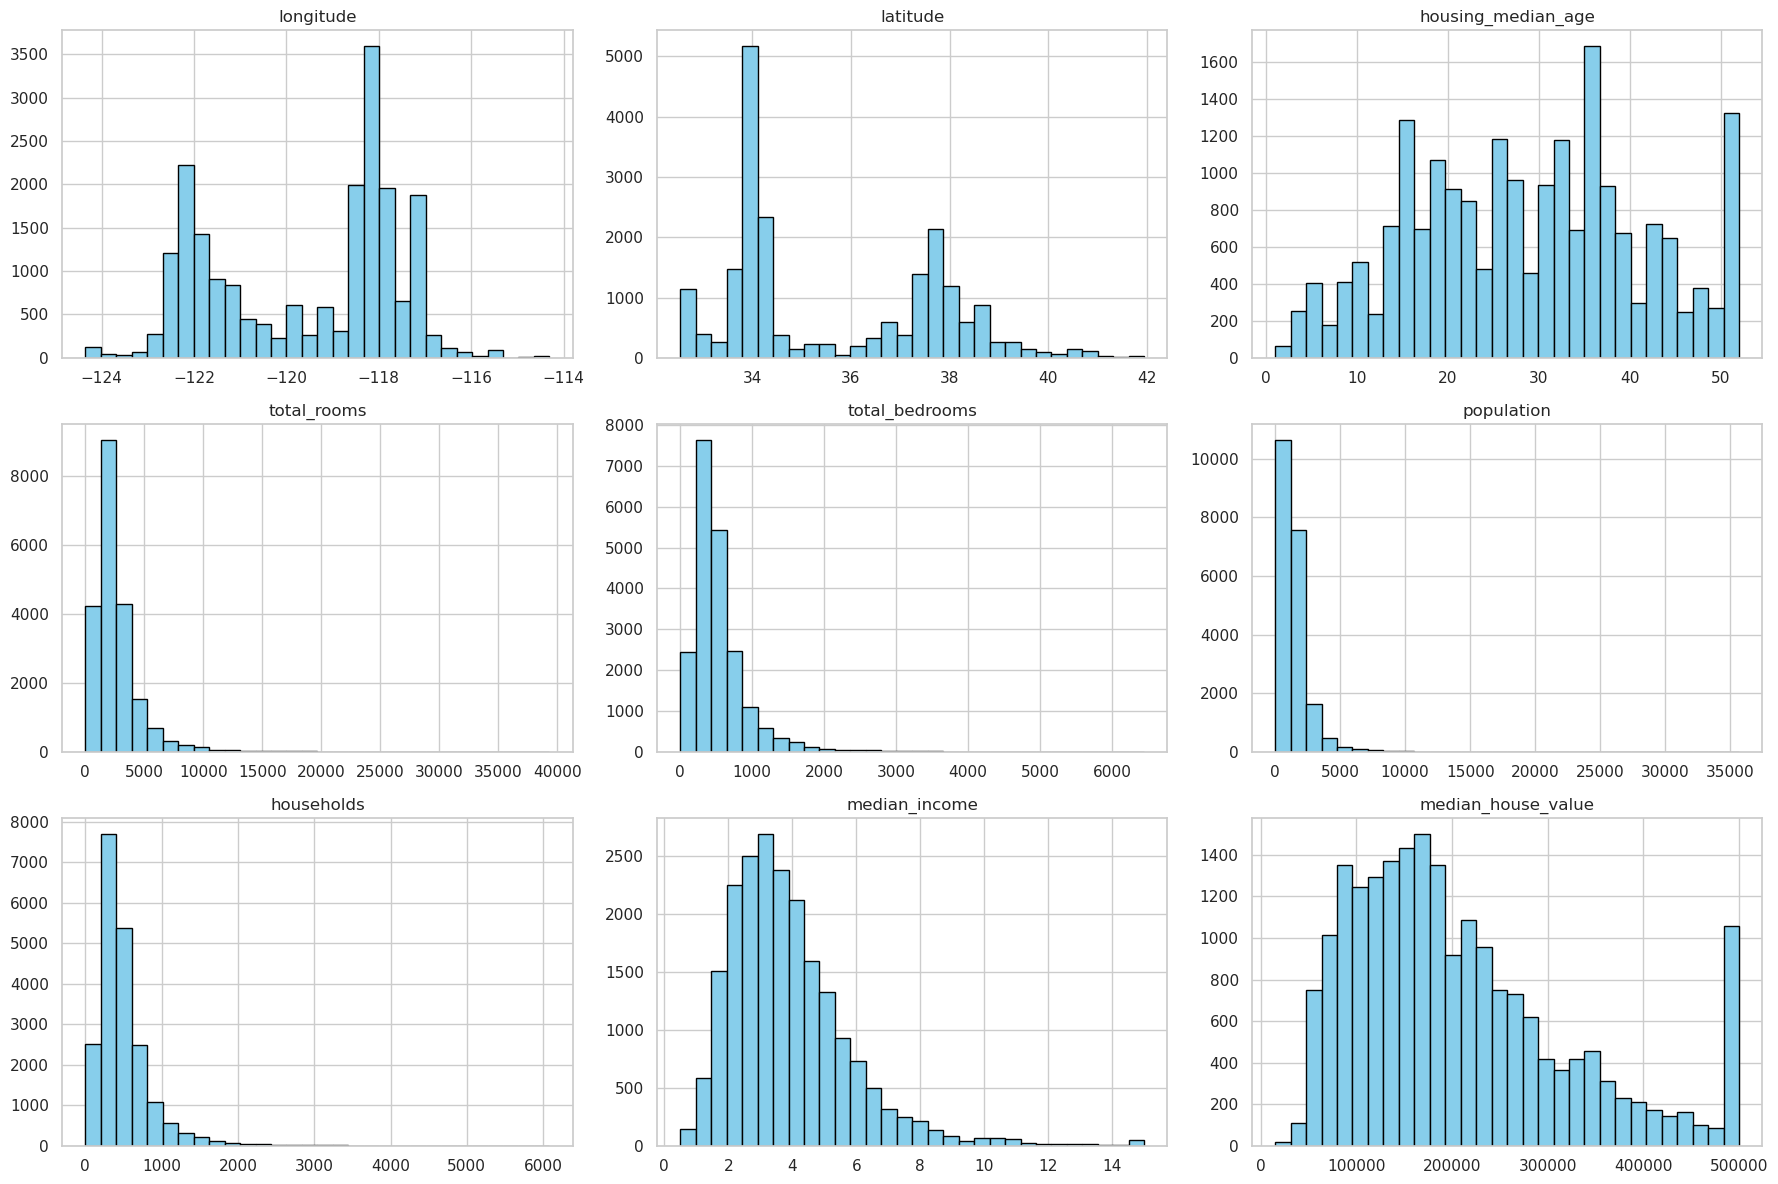

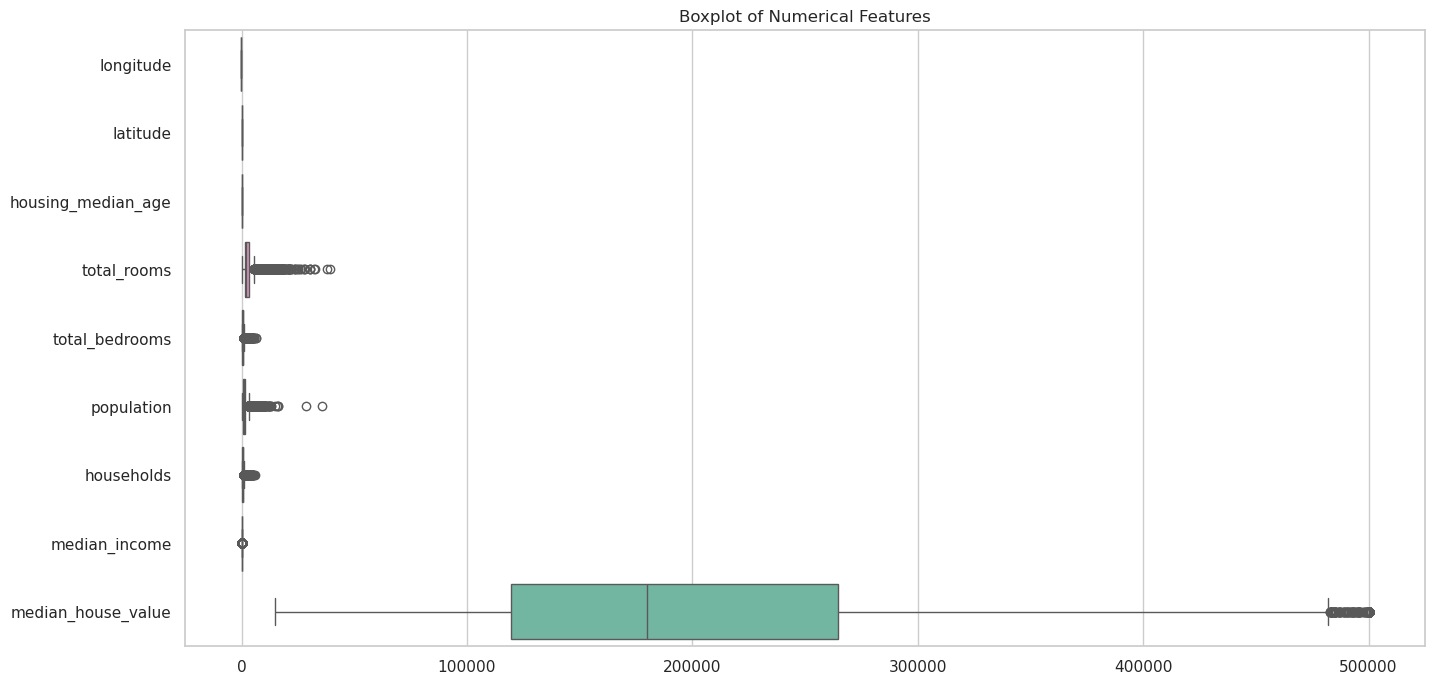

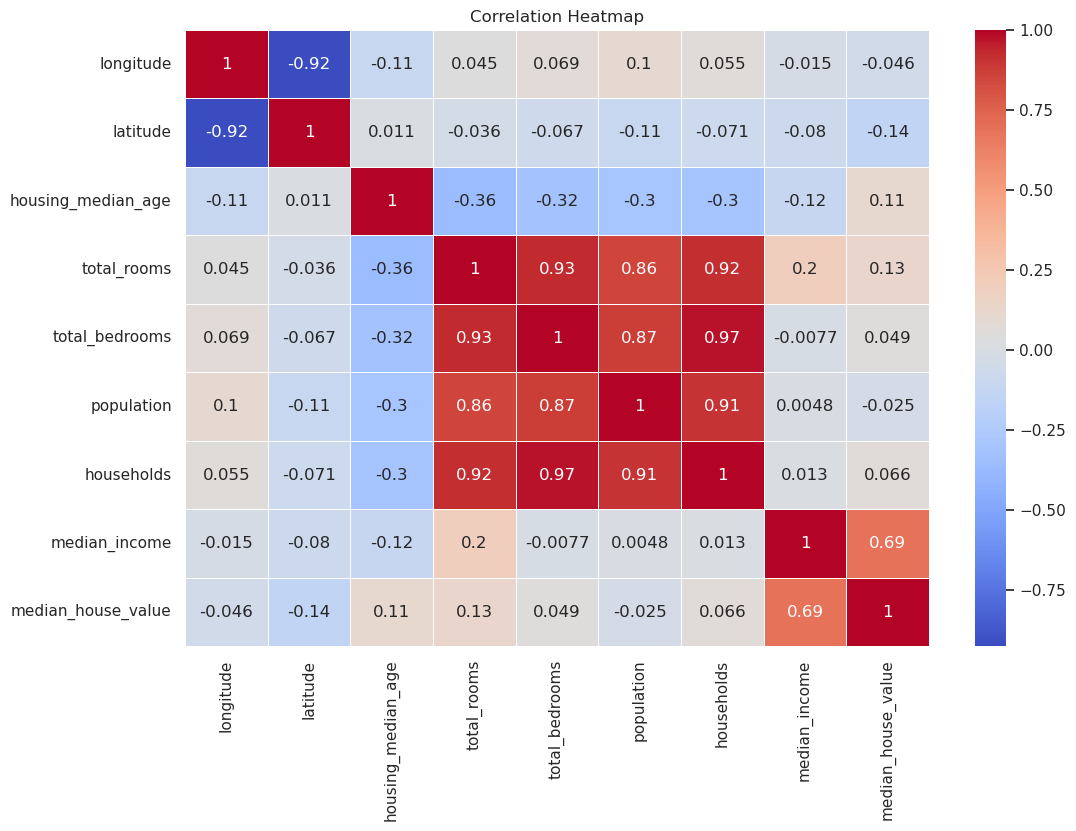

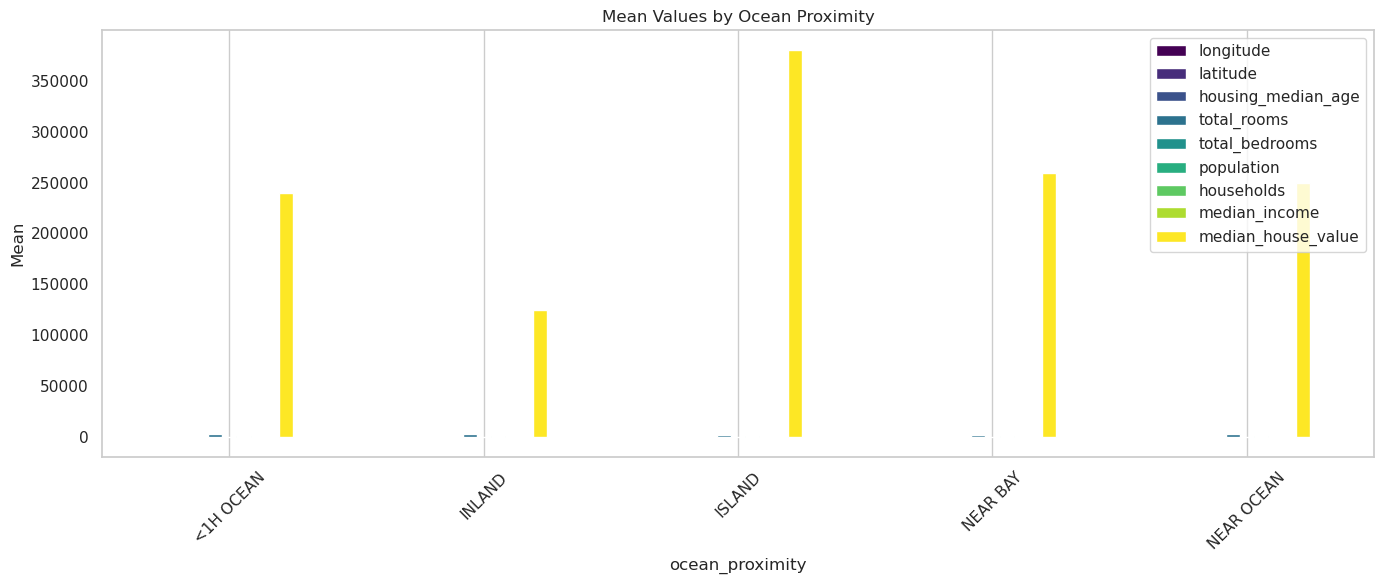

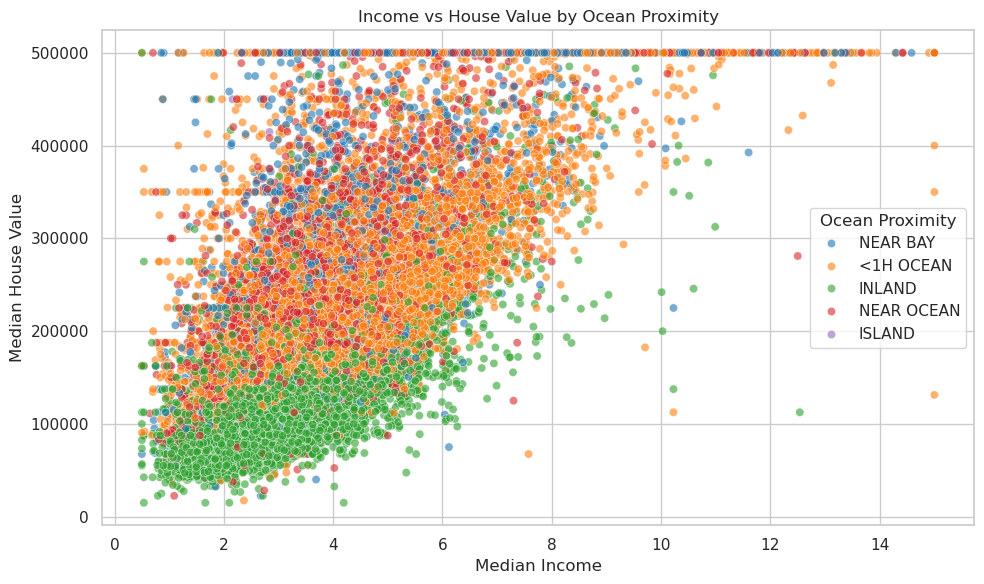

In [15]:

# Fill missing values
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(), inplace=True)

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(20, 5))
plt.suptitle("Basic Data Analysis and Visualization", fontsize=16)

# 1. Histogram of all numeric features
data.hist(bins=30, figsize=(18, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# 2. Boxplot for outlier detection
plt.figure(figsize=(16, 8))
sns.boxplot(data=data.select_dtypes(include='number'), orient="h", palette="Set2")
plt.title('Boxplot of Numerical Features')
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(12, 8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 4. Group by 'ocean_proximity' and calculate mean of numerical features
group_means = data.groupby('ocean_proximity').mean(numeric_only=True)
group_means.plot(kind='bar', figsize=(14, 6), colormap='viridis')
plt.title("Mean Values by Ocean Proximity")
plt.ylabel("Mean")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 5. Scatter plot: median_income vs median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='median_income',
    y='median_house_value',
    hue='ocean_proximity',
    data=data,
    palette='tab10',
    alpha=0.6
)
plt.title("Income vs House Value by Ocean Proximity")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend(title='Ocean Proximity')
plt.tight_layout()
plt.show()